In [3]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 200

battingDF = pd.read_csv("Batting.csv")
battingDF.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [6]:
# top 25 homerun total in a season?
# who has hit the most homeruns?
battingDF[["playerID","HR","yearID"]].sort_values("HR",ascending=False).head(25)

,playerID,HR,yearID
80752,bondsba01,73,2001
77389,mcgwima01,70,1998
77736,sosasa01,66,1998
78705,mcgwima01,65,1999
81770,sosasa01,64,2001
79053,sosasa01,63,1999
41661,marisro01,61,1961
22256,ruthba01,60,1927
19039,ruthba01,59,1921
24639,foxxji01,58,1932


In [9]:
# barry bonds is at the top of the list. let's see how he's done over the years
# how do we only get barry bonds's data?
battingDF[["playerID","HR","yearID","G","AB"]].sort_values("HR",
    ascending=False).loc[battingDF["playerID"]=="bondsba01"]

,playerID,HR,yearID,G,AB
80752,bondsba01,73,2001,153,476
79377,bondsba01,49,2000,143,480
70779,bondsba01,46,1993,159,539
82081,bondsba01,46,2002,143,403
83409,bondsba01,45,2003,130,390
84761,bondsba01,45,2004,147,373
74255,bondsba01,42,1996,158,517
75505,bondsba01,40,1997,159,532
71937,bondsba01,37,1994,112,391
76749,bondsba01,37,1998,156,552


In [10]:
bbHRStats = battingDF[["playerID","HR","yearID","G","AB"]].sort_values("HR",
    ascending=False).loc[battingDF["playerID"]=="bondsba01"]

In [12]:
import seaborn as sb
%matplotlib inline

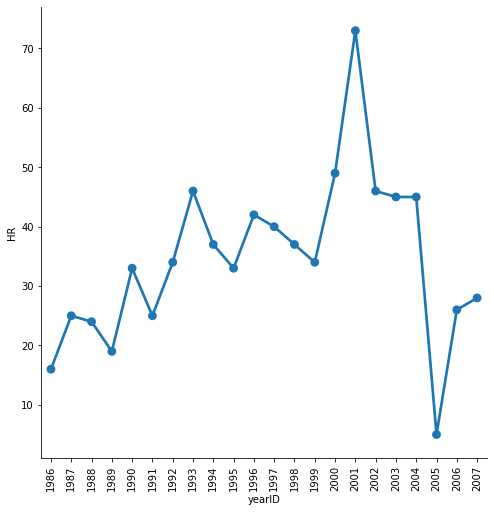

In [23]:
sb.factorplot(x="yearID",y="HR",data=bbHRStats,size=7).set_xticklabels(rotation=90)

In [25]:
len(battingDF["playerID"].unique()) # unique gives us the unique playerIDs in battingDF

18915

In [26]:
# introducing: Grouping
# .groupby makes a Group object:
playerIDGrouping = battingDF.groupby("playerID")

In [27]:
type(playerIDGrouping)

pandas.core.groupby.generic.DataFrameGroupBy

In [28]:
len(playerIDGrouping)

18915

In [30]:
playerIDGrouping.groups
# this looks like a dictionary

{'aardsda01': Int64Index([84639, 87315, 88692, 90077, 91462, 92850, 95595, 97003, 99847], dtype='int64'),
 'aaronha01': Int64Index([36873, 37449, 38104, 38725, 39340, 39978, 40610, 41247, 41945,
             42705, 43457, 44211, 44962, 45736, 46522, 47237, 48169, 49088,
             49971, 50859, 51751, 52665, 53572],
            dtype='int64'),
 'aaronto01': Int64Index([41946, 42706, 44212, 46523, 47238, 48170, 49089], dtype='int64'),
 'aasedo01': Int64Index([54458, 55442, 56402, 57363, 58313, 59257, 61255, 62239, 63237,
             64254, 65302, 66337, 67410],
            dtype='int64'),
 'abadan01': Int64Index([80634, 83292, 87316], dtype='int64'),
 'abadfe01': Int64Index([92851, 94206, 95596, 97004, 98412, 99848, 101333, 101334], dtype='int64'),
 'abadijo01': Int64Index([519, 520], dtype='int64'),
 'abbated01': Int64Index([6951, 7231, 8964, 9364, 9770, 10614, 11060, 11530, 12073, 12074], dtype='int64'),
 'abbeybe01': Int64Index([5461, 5771, 6057, 6351, 6352, 6656], dtype='int64'),

In [31]:
type(playerIDGrouping.groups)

dict

In [ ]:
# groups property is a dictionary where the keys are the playerIDs (the things we grouped on)
# and the values are row indexes

In [32]:
playerIDGrouping.groups["bondsba01"] # bonds's data

Int64Index([63321, 64337, 65393, 66440, 67508, 68624, 69708, 70779, 71937,
            73002, 74255, 75505, 76749, 78074, 79377, 80752, 82081, 83409,
            84761, 86093, 87432, 88805],
           dtype='int64')

In [33]:
battingDF.loc[[63321,64337,65393]]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
63321,bondsba01,1986,1,PIT,NL,113,413,72,92,26,3,16,48.0,36.0,7.0,65,102.0,2.0,2.0,2.0,2.0,4.0
64337,bondsba01,1987,1,PIT,NL,150,551,99,144,34,9,25,59.0,32.0,10.0,54,88.0,3.0,3.0,0.0,3.0,4.0
65393,bondsba01,1988,1,PIT,NL,144,538,97,152,30,5,24,58.0,17.0,11.0,72,82.0,14.0,2.0,0.0,2.0,3.0


In [34]:
playerIDGrouping.get_group("bondsba01")

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
63321,bondsba01,1986,1,PIT,NL,113,413,72,92,26,3,16,48.0,36.0,7.0,65,102.0,2.0,2.0,2.0,2.0,4.0
64337,bondsba01,1987,1,PIT,NL,150,551,99,144,34,9,25,59.0,32.0,10.0,54,88.0,3.0,3.0,0.0,3.0,4.0
65393,bondsba01,1988,1,PIT,NL,144,538,97,152,30,5,24,58.0,17.0,11.0,72,82.0,14.0,2.0,0.0,2.0,3.0
66440,bondsba01,1989,1,PIT,NL,159,580,96,144,34,6,19,58.0,32.0,10.0,93,93.0,22.0,1.0,1.0,4.0,9.0
67508,bondsba01,1990,1,PIT,NL,151,519,104,156,32,3,33,114.0,52.0,13.0,93,83.0,15.0,3.0,0.0,6.0,8.0
68624,bondsba01,1991,1,PIT,NL,153,510,95,149,28,5,25,116.0,43.0,13.0,107,73.0,25.0,4.0,0.0,13.0,8.0
69708,bondsba01,1992,1,PIT,NL,140,473,109,147,36,5,34,103.0,39.0,8.0,127,69.0,32.0,5.0,0.0,7.0,9.0
70779,bondsba01,1993,1,SFN,NL,159,539,129,181,38,4,46,123.0,29.0,12.0,126,79.0,43.0,2.0,0.0,7.0,11.0
71937,bondsba01,1994,1,SFN,NL,112,391,89,122,18,1,37,81.0,29.0,9.0,74,43.0,18.0,6.0,0.0,3.0,3.0
73002,bondsba01,1995,1,SFN,NL,144,506,109,149,30,7,33,104.0,31.0,10.0,120,83.0,22.0,5.0,0.0,4.0,12.0


In [35]:
type(playerIDGrouping.get_group("bondsba01"))
# get_group works like a filter
# gives you a dataframe where the rows are for playerID = bondsba01

pandas.core.frame.DataFrame

In [39]:
playerIDGrouping.get_group("bondsba01")[["HR","AB","yearID"]]

,HR,AB,yearID
63321,16,413,1986
64337,25,551,1987
65393,24,538,1988
66440,19,580,1989
67508,33,519,1990
68624,25,510,1991
69708,34,473,1992
70779,46,539,1993
71937,37,391,1994
73002,33,506,1995


In [40]:
playerIDGrouping.get_group("mcgwima01")[["HR","AB","yearID"]]

,HR,AB,yearID
63825,3,53,1986
64858,49,557,1987
65894,32,550,1988
66955,33,490,1989
68062,39,523,1990
69175,22,483,1991
70236,42,467,1992
71370,9,84,1993
72453,9,135,1994
73611,39,317,1995


In [41]:
# total homeruns for barry bonds?
sum(playerIDGrouping.get_group("bondsba01")["HR"])

762

In [42]:
# highest # of homeruns in a season?
max(playerIDGrouping.get_group("bondsba01")["HR"])

73

In [44]:
# we got summary info for individual players. what if we wanted to do this sort of thing
# for all players?
battingDF.groupby("playerID").agg({"HR":sum})
# method: agg
# takes a dictionary as a parameter
# the key in this dictionary is the column we want to aggregate on
# the value is the function that we'll use to aggregate
# here we're just summing the homeruns for all players over their careers

,HR
playerID,
aardsda01,0
aaronha01,755
aaronto01,13
aasedo01,0
abadan01,0
...,...
zupofr01,0
zuvelpa01,2
zuverge01,0


In [45]:
type(battingDF.groupby("playerID").agg({"HR":sum})) # the agg method which MUST be run on 
# a groupby object returns a DataFrame

pandas.core.frame.DataFrame

In [46]:
battingDF.groupby("playerID").agg({"HR":sum}).loc["bondsba01"]

HR    762
Name: bondsba01, dtype: int64

In [48]:
# what are the top total homeruns across careers? get the top 15
battingDF.groupby("playerID").agg({"HR":sum}).sort_values("HR",ascending=False).head(15)

,HR
playerID,
bondsba01,762
aaronha01,755
ruthba01,714
rodrial01,696
mayswi01,660
griffke02,630
thomeji01,612
sosasa01,609
pujolal01,591


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a236cd080>]],
      dtype=object)

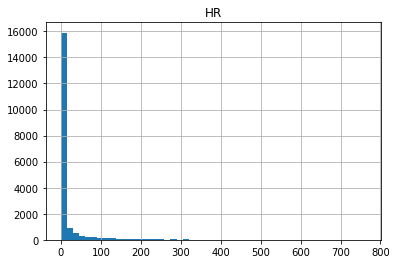

In [49]:
battingDF.groupby("playerID").agg({"HR":sum}).hist(bins=50)

In [51]:
# what's the average number of homeruns per game per year?
battingDF.groupby("yearID").agg({"HR":np.mean}).sort_values("HR",ascending=False)

,HR
yearID,
1999,4.255581
1987,4.253817
2000,4.113439
2001,4.076176
2004,4.049777
...,...
1876,0.322581
1878,0.287500
1877,0.247423
